In [2]:
%pylab notebook
import sys, os
import pandas as pd
import importlib

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation/')
import hts_misc as misc
import hts_fitting as hts
import hts_dosecalculations as dose
importlib.reload(misc)
importlib.reload(hts)
importlib.reload(dose)

from scipy import stats as st

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
('beamon-1200keV-pristine.txt', 690)
('beamon-1200keV-step1.txt', 607)
('beamon-1200keV-step1.txt', 118)
('beamon-150keV-step2.txt', 56057)
('beamon-1200keV-step2', 288)

('beamon-1200keV-step2', 288)

<IPython.core.display.Javascript object>


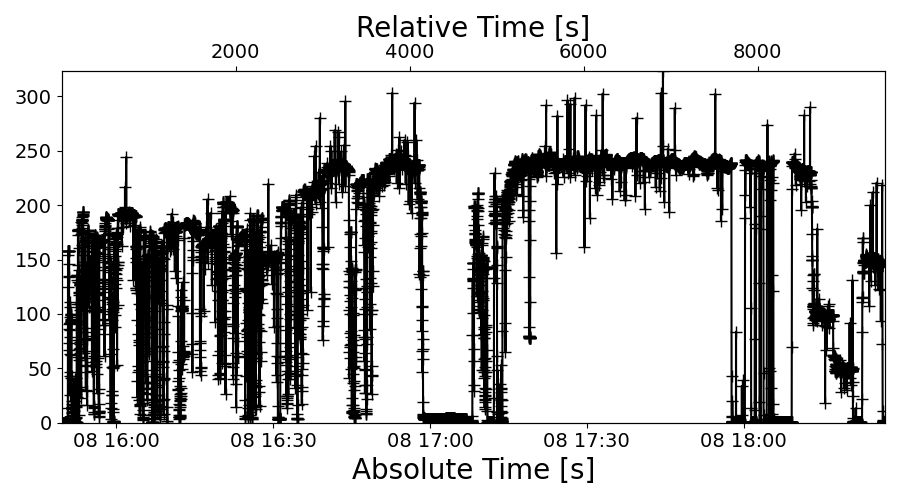

2024-02-08 15:49:34 2024-02-08 18:27:02


FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/FFJ/2024-02-05_f29/beamon-150keV-step2.txt'

In [3]:
ivpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/FFJ/2024-02-05_f29/'
ibpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Fluence data/Proton_2024_02_07-f29.xlsx'

data = dose.loadBeamCurrent(ibpath, sname='BeamOn150keV-pristine')

fig, ax = plt.subplots(figsize=(9, 5))
fig, axrt, axat = dose.plotBeamCurrent(data, fig=fig)

times = []
curves = []
with open(ivpath+'beamon-150keV-step2.txt', 'r') as f:
    for line in f.readlines():
        if line.split('-')[-2] != '0nA':
            curves.append(line.strip())
            line = line.split('_')[1]+'-'+line.split('_')[2]
            times.append(misc.timestamp_to_seconds(line))
    f.close()
times = np.array(times)
times = times-times[0]+690

for t, c in zip(times, curves):
    ax.axvline(t, color='b', linestyle=':')
    #print('{:>7.0f}'.format(t), c)
    print(c)
len(times)

## Step2 - 6e20 p/m$^2$
### BeamOn 1200 keV

<IPython.core.display.Javascript object>


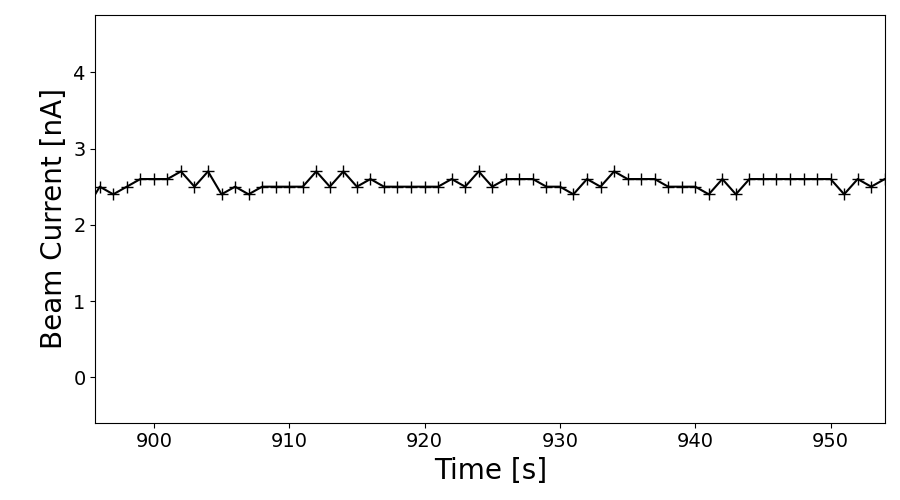

Ic_2024-02-09_14-13-05376799_f29-6e20pm2-1200keV-29nA-20k.txt
Ic_2024-02-09_14-14-39552647_f29-6e20pm2-1200keV-28nA-20k.txt
Ic_2024-02-09_14-16-03284996_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-17-37906289_f29-6e20pm2-1200keV-29nA-20k.txt
Ic_2024-02-09_14-20-32976865_f29-6e20pm2-1200keV-29nA-20k.txt
Ic_2024-02-09_14-22-01927886_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-23-13712462_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-24-27502823_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-25-24762599_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-28-30714196_f29-6e20pm2-1200keV-29nA-20k.txt
Ic_2024-02-09_14-30-52323098_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-35-40421852_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-36-56323397_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-38-16729794_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-40-06963963_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-02-09_14-41-01217789_f29-6e20pm2-1200keV-30nA-20k.txt
Ic_2024-

34

In [5]:
ivpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/FFJ/2024-02-05_f29/'
ibpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Fluence data/Proton_2024_02_07-f29.xlsx'

data = dose.loadBeamCurrent(ibpath, sname='BeamOn1200keV-step2')

fig, ax = plt.subplots(figsize=(9, 5))
fig, ax = dose.plotBeamCurrent(data, fig=fig)

times = []
curves = []
with open(ivpath+'beamon-1200keV-step2.txt', 'r') as f:
    for line in f.readlines():
        if line.split('-')[-2] != '0nA':
            curves.append(line.strip())
            line = line.split('_')[1]+'-'+line.split('_')[2]
            times.append(misc.timestamp_to_seconds(line))
    f.close()
times = np.array(times)
times = times-times[0]+117

for t, c in zip(times, curves):
    ax.axvline(t, color='b', linestyle=':')
    #print('{:>7.0f}'.format(t), c)
    print(c)
len(times)

In [13]:
tHTS = temperature[0][-10:].mean()
tTAR = temperature[1][-10:].mean()
tHTS, tTAR

(20.110519999999998, 19.64332)

In [153]:
fig, ax = plt.subplots(figsize=(9, 5))

#
#
# .
0``
df = pd.read_excel('../../analysis_beam-on-off/beamon.xlsx', sheet_name='data', usecols=[0, 4, 12, 13, 14, 15], names=['sample', 'dataseries', 'f0', 'foff', 'fon', 'feq'])
df = df[(df['sample'] == 'f29') & (df.dataseries == 'BeamOn150keV-pristine')]

fname = df.foff.values[18] #18 #28
print(fname)

file = ivpath+'Ic/Ic_2024-02-08_11-29-02931688_f29-pristine-150keV-150nA-20k.txt'#+fname

ic, n, current, voltage, chisq = hts.fitIcMeasurement(file, function='powerLaw', vMax=10e-6, vb=False)
_, _, temperature = hts.readIV(file)
tHTS = temperature[0][-10:].mean()
tTAR = temperature[1][-10:].mean()
    
hts.plotFit(current, function=hts.powerLaw, popt=[ic, n], fig=fig)
ax.plot(current, voltage*1e6, marker='o', color='b', alpha=.1)
hts.plotIV(file, fig=fig, color='k')
ax.axhline(0.2, linestyle=':', color='k')

#ax.set_ylim(-.5, 2)
#ax.set_xlim(3, 8)

print(ic, n, tHTS, tTAR)

<IPython.core.display.Javascript object>

FileNotFoundError: [Errno 2] No such file or directory: '../../analysis_beam-on-off/beamon.xlsx'

In [ ]:
##### fig, ax = plt.subplots()
j = 0
with open(ivpath+'beamon-150keV-pristine.txt', 'r') as f:
    
    files = [ivpath+'Ic/'+file.strip() for file in f.readlines() if file.split('-')[-2] == '0nA']
    
    ic, n, current, voltage, chisq = hts.fitIcMeasurement(files[j], function='powerLaw')
    
    _, _, temperature = hts.readIV(files[j])
    tHTS = temperature[0][-10:].mean()
    tTAR = temperature[1][-10:].mean()
    
    hts.plotFit(current, function=hts.powerLaw, popt=[ic, n], fig=fig)
    ax.plot(current, voltage*1e6, marker='o', color='b', alpha=.1)
    hts.plotIV(files[j], fig=fig, color='k')
    ax.axhline(0.2, linestyle=':', color='k')
    f.close()

# New irradiation after room temperature anneal

Ic doubled in the anneal. Lauryn and Alexis attempted to get more 800 keV and 2400 keV beam on data on February 27.
The 2400 keV results yielded unexpectedly high Ic suppression.

In [157]:
def getMeasurementStartTime(files, year='2024'):
    starttimes = []
    for file in files:
        df = pd.read_csv(ivpath+file, usecols=[0], names=['date'], dtype={'date': 'str'}, delim_whitespace=True, skiprows=2)
        startdate = year+df['date'][0][4:]
        starttimes.append(pd.to_datetime('-'.join(startdate.split('_'))))
    return starttimes
    
files = [
    'Ic_2024-02-09_11-58-20041699_f29-6e20pm2-150keV-240nA-20k.txt',
    'Ic_2024-02-09_11-58-20041699_f29-6e20pm2-150keV-240nA-20k.txt'
]

getMeasurementStartTime(files)

[Timestamp('2024-02-09 11:58:15.973000'),
 Timestamp('2024-02-09 11:58:15.973000')]

In [9]:
data = pd.read_excel(ibpath, sheet_name=sname, usecols=[1, 2], names=['time', 'ibeam'])

In [11]:
cut = data[(17536 < data.time) & (data.time < 17548) & (data.ibeam > 2e-10)]
cut['ibeam'].mean()*1e9, cut['ibeam'].std()*1e9


(44.80650000000001, 0.07488623850847866)

<IPython.core.display.Javascript object>


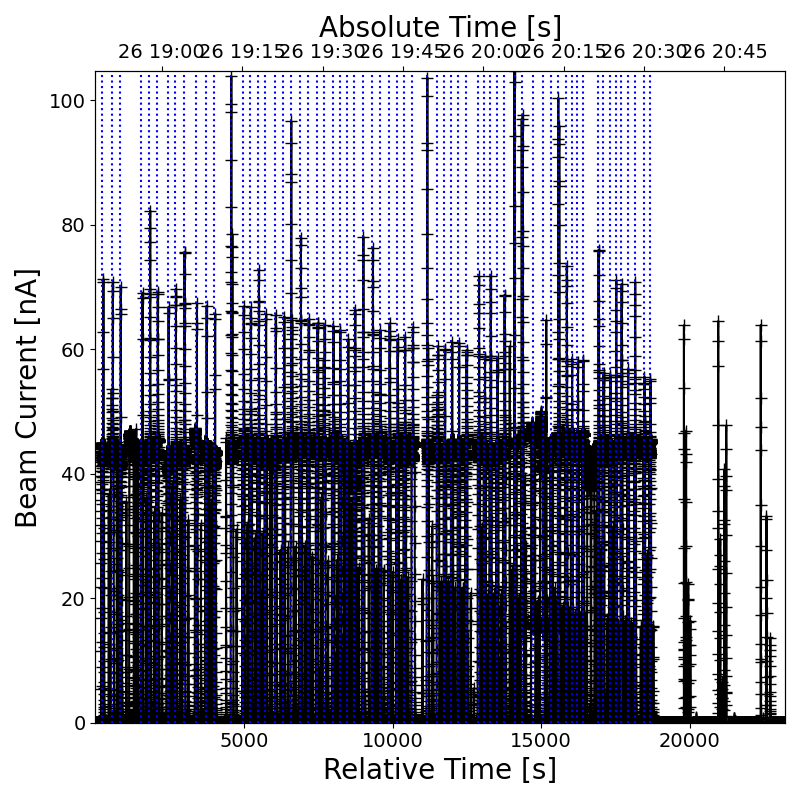

(<Figure size 800x800 with 2 Axes>,
 <Axes: xlabel='Relative Time [s]', ylabel='Beam Current [nA]'>,
 <Axes: xlabel='Absolute Time [s]'>)

In [6]:
ivpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/2024_02_BEAMON/data/Ic/f29/'
ibpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/2024_02_BEAMON/data/flux/f29.xlsx'
sname = 'Anneal1-BeamOn800keV'

fpaths = [ivpath+file for file in os.listdir(ivpath) if (file[:2]=='Ic') and (file.split('-')[-3] == '800keV') and (file.split('-')[-2] != '0nA') and (float(file.split('_')[1].split('-')[-1]) <= 26)]
    
dose.plotBeamCurrentWithMeasurements(fpaths=fpaths, ibpath=ibpath, sname=sname)

In [39]:
np.mean([10.68, 10.56, 10.63, 10.62, 10.63])

10.624

In [56]:
from scipy.optimize import curve_fit
def sqrt_abc(x, a, b, c):
    return a*np.sqrt(c*x)+b

def pol2(x, a, b, c):
    return a*x**3+b*x**2+c

def log_abc(x, a, b, c):
    return a*np.log(c*x)+b

<IPython.core.display.Javascript object>


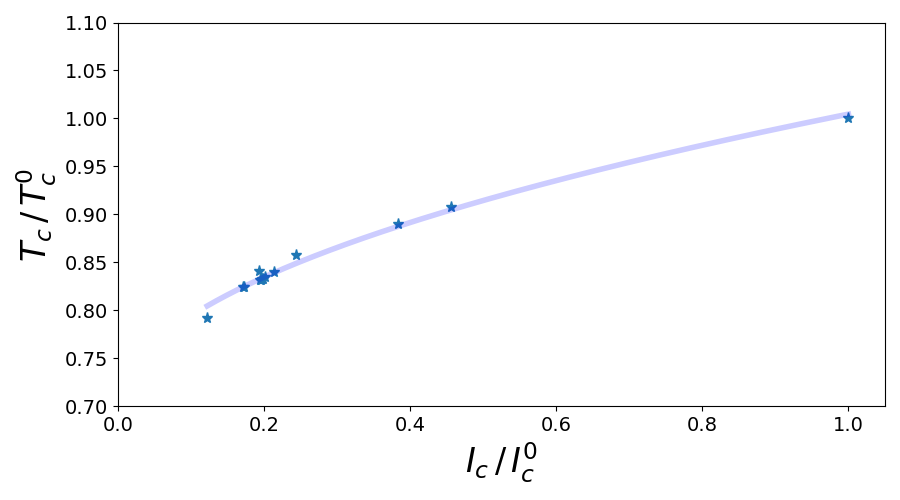

/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_94983/726761347.py:3: RuntimeWarning: invalid value encountered in sqrt
  return a*np.sqrt(c*x)+b


In [67]:
labels = [
    'unirradiated',
    '3e20pm2',
    '6e20pm2',
    'after-beamOnTests1',
    'anneal092K',
    'anneal100K',
    'anneal110K',
    'anneal130K',
    'anneal300K',
    'after-beamOnTests2a', # temporarily removed 10.62, 70.9,
    'anneal300K-2',
    'after-beamOnTests2b',
    'anneal310K',
    'after-beamOnTests3'
    'aneal300K-7h'
]

tc = np.array([88.45, 80.25, 74.30, 73.55, 73.55, 73.65, 73.65, 73.85, 78.70, 74.35, 72.95, 75.90, 70.10, 72.9])
ic = np.array([34.13, 15.58, 7.27, 6.65, 6.68, 6.72, 6.76, 6.88, 13.09, 6.59, 5.88, 8.34, 4.17, 5.86])
tc_norm, ic_norm = tc/tc[0], ic/ic[0]
fig, ax = plt.subplots(figsize=(9, 5))

popt, pcov = curve_fit(sqrt_abc, ic, tc)
xsmooth = np.linspace(min(ic), max(ic), 1000)

ax.plot(ic_norm, tc_norm, marker='*', linestyle='None')
ax.plot(xsmooth/ic[0], sqrt_abc(xsmooth, *popt)/tc[0], linewidth=4, alpha=.2, color='b')

ax.set_xlabel('$I_c \, / \, I_c^0$', fontsize=24)
ax.set_ylabel('$T_c \, / \, T_c^0$', fontsize=24)
ax.set_xlim(0., 1.05)
ax.set_ylim(0.7, 1.1)

fig.tight_layout()

In [68]:
popt

array([ 1.22729415, 61.67295024, 14.37055047])

Ic_2024-02-26_23-40-00253223_f29-2400keV-7nA-20k.txt
Ic_2024-02-26_23-42-29682753_f29-2400keV-3p5nA-20k.txt
Ic_2024-02-26_23-43-19262179_f29-2400keV-1p5nA-20k.txt
Ic_2024-02-26_23-44-13784632_f29-2400keV-4nA-20k.txt
Ic_2024-02-26_23-44-54741878_f29-2400keV-5nA-20k.txt
Ic_2024-02-26_23-45-24424167_f29-2400keV-6nA-20k.txt
Ic_2024-02-26_23-47-14989532_f29-2400keV-9nA-20k.txt
Ic_2024-02-26_23-47-51964136_f29-2400keV-9nA-20k.txt
Ic_2024-02-26_23-49-16252208_f29-2400keV-8nA-20k.txt
Ic_2024-02-26_23-49-49205338_f29-2400keV-8nA-20k.txt
Ic_2024-02-26_23-50-55493573_f29-2400keV-8nA-20k.txt
Ic_2024-02-26_23-52-52728652_f29-2400keV-1nA-20k.txt
Ic_2024-02-26_23-53-30881228_f29-2400keV-1nA-20k.txt
Ic_2024-02-26_23-54-08475056_f29-2400keV-1nA-20k.txt
Ic_2024-02-26_23-54-36278841_f29-2400keV-1nA-20k.txt
Ic_2024-02-27_05-01-08914419_f29-2400keV-15nA-20k.txt
Ic_2024-02-27_05-01-21546065_f29-2400keV-15nA-20k.txt
Ic_2024-02-27_05-01-37481328_f29-2400keV-15nA-20k.txt
Ic_2024-02-27_05-06-51332134_f29-2400ke

<IPython.core.display.Javascript object>


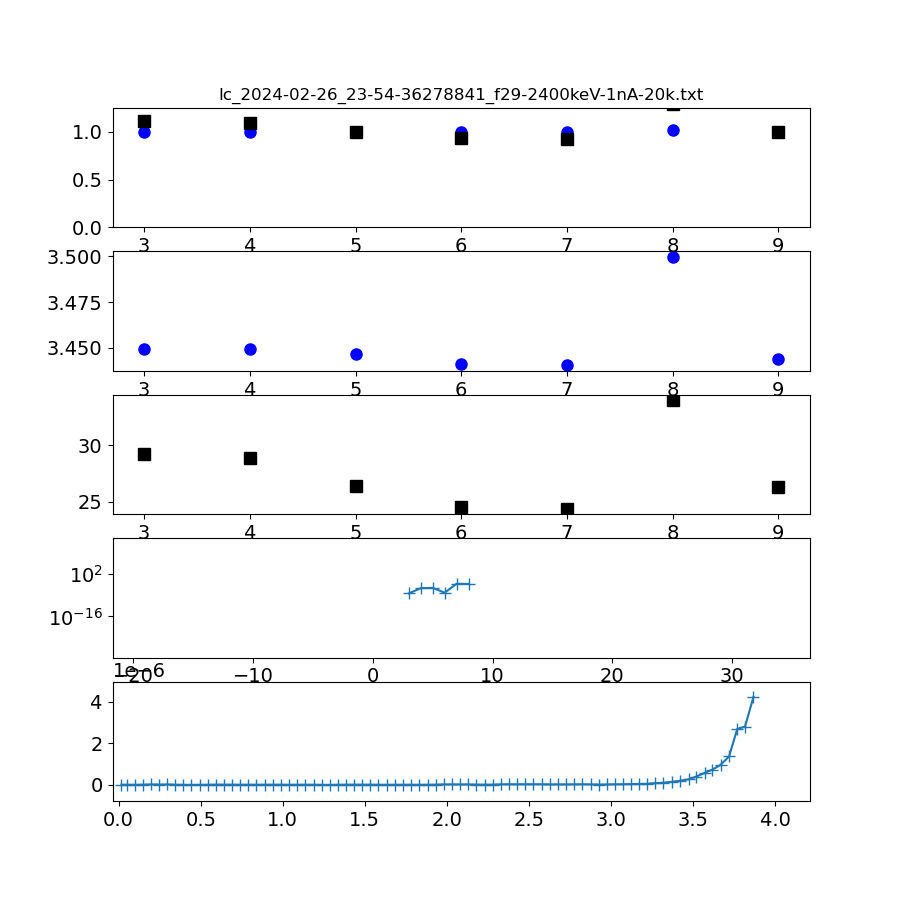

The mode is ModeResult(mode=nan, count=2)


Text(0.5, 1.0, 'Ic_2024-02-26_23-54-36278841_f29-2400keV-1nA-20k.txt')

In [133]:
i = 14
plt.ion()
ivpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/2024_02_BEAMON/data/Ic/f29/'
files = np.sort([f for f in os.listdir(ivpath) if (f.split('_')[0] == 'Ic') and (float(f.split('_')[1].split('-')[2]) >= 10)])

files = [f for f in files if (f.split('-')[-2] != '0nA') & (f.split('-')[-3] == '2400keV')]

for f in files:
    print(f)

vMaxs, ics, ns = np.arange(2e-6, 30e-6, 1e-6), [], []
#hts.plotIV(ivpath+files[i], fig=fig, color='k')
current, voltage, _ = hts.readIV(ivpath+files[i])

vMaxs = voltage[0.2e-6 < voltage]
index = []
for (j, vMax) in enumerate(vMaxs):
    ic, n, current, voltage, chisq, pcov = hts.fitIcMeasurement(ivpath+files[i], function=hts.linear, vMax=vMax)
    ics.append(ic)
    ns.append(n)
    index.append(j)

fig, ax = plt.subplots(5, 1, figsize=(9, 9))
x = np.array(index)+1 #vMaxs*1e6
yic = np.array(ics)
yns = np.array(ns)
ax[0].plot(x, yic/ics[-1], color='b', marker='o', label='Ic/Ic0', linestyle='None')
ax[0].plot(x, yns/yns[-1], color='k', marker='s', label='n/n0', linestyle='None')
ax[0].set_ylim(0, 1.25)
ax[1].plot(x, yic, color='b', marker='o', label='Ic', linestyle='None')
ax[2].plot(x, yns, color='k', marker='s', label='n', linestyle='None')
ax[3].semilogy(x[:-1], np.abs(np.diff(yic/yic[-1])*np.diff(yns/yns[-1])), marker='+')

current, voltage, _ = hts.readIV(ivpath+files[i])
ax[4].plot(current, voltage, marker='+')

print('The mode is', st.mode(np.array(ics)))
#ax.plot(current, voltage*1e6, marker='o', color=c, alpha=.1)
#xsmooth = np.linspace(np.min(current), np.min(current), 10000)
#hts.plotFit(current, hts.powerLaw, [ic, n], fig=fig, color=c, alpha=.2)
#ax.axhline(.2, color='k', linestyle=':')
ax[0].set_title(files[i])

#ax.set_ylim(-.5, 1)

# Third beam-on dataset after 2.5 days at 310 K

We found that the anomalous 2400 keV data comes from small beam current inhomogeneities accentuated by the high energy of the ions.

In [1]:
ivpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/2024_02_BEAMON/data/Ic/f29/newcomers/'
fpaths = [file for file in sort(os.listdir(ivpath)) if (file[:2]=='Ic') and (file.split('-')[-3] == '2400keV') and (file.split('-')[-2] == '0nA') and (float(file.split('_')[1].split('-')[-2]) >= 3)]
for path in fpaths:
    print(path)

NameError: name 'sort' is not defined

<IPython.core.display.Javascript object>


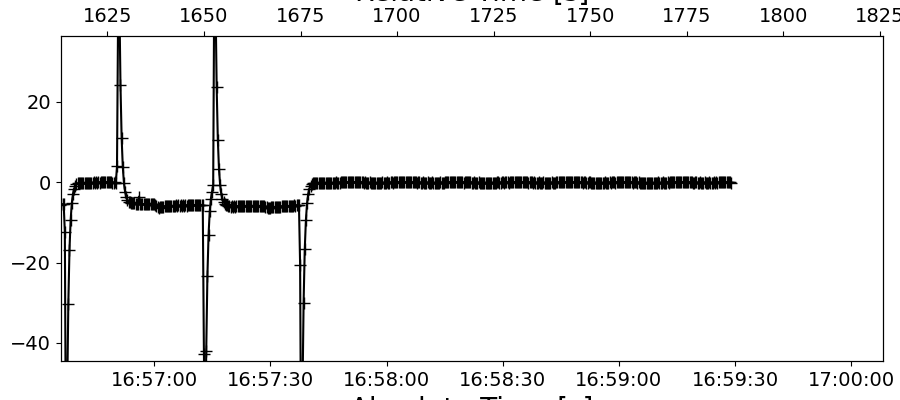

2024-03-01 16:29:47 2024-03-01 16:59:29


In [4]:
ivpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Coated conductors/2024_02_BEAMON/data/Ic/f29/'
ibpath = '/Users/alexisdevitre/Dropbox (MIT)/2020 PhD/Research/Samples/Fluence data/Proton_2024_03_01-f29-3.xlsx'
sname = 'BeamOn2400keV-2'

fpaths = [ivpath+file for file in os.listdir(ivpath) if (file[:2]=='Ic') and (file.split('-')[-3] == '2400keV') and (file.split('-')[-2] != '0nA') and (float(file.split('_')[1].split('-')[-2]) >= 3)]
    
fig, ax, axdt = dose.plotBeamCurrentWithMeasurements(fpaths=fpaths, ibpath=ibpath, sname=sname)

fig.set_size_inches(9,4)
